# Meringkas Dokumen


In [1]:
import numpy as np
import PyPDF2
import sys
import csv
import re
from IPython.display import Image
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import networkx as nx

In [4]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# Membaca dokumen

In [6]:
df = pd.read_csv('haha.csv', encoding='utf-8')
a=df.iloc[:, 0]
arrpa=[]
s=""
for zz in a:
    zz=zz[14:]
    text=' '.join(re.sub("(@[A-Za-z-9]+)|(\w+:\/\/\S+)"," ",zz).split())
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',text)

    arrpa.append(text)
arrpa

['Polisi telah menahan Imam Besar Front Pembela Islam (FPI) Rizieq Shihab setelah diperiksa selama 14 jam oleh penyidik. Rizieq ditahan sebagai tersangka dalam kasus kerumunan massa di pernikahan putrinya.Mengenai hal itu, Wakil Ketua Umum Majelis Ulama Indonesia (MUI) Anwar Abbas mengatakan, melakukan kegiatan yang telah menyebabkan terjadinya kerumunan itu jelas tidak baik. Sebab, Covid-19 akan menular dengan cepat melalui kerumunan tersebut.“Oleh karena itu di masa Covid-19 ini kita jangan menyelenggarakan acara yang mengundang orang untuk berkumpul-kumpul sehingga terjadi kerumunan,” jelasnya kepada JawaPos.com, Minggu (13/12).Namun, ia juga mempertanyakan keadilan atas kasus kerumunan tersebut. Kata dia, tentu bukan hanya Rizieq saja yang melakukan kegiatan itu. Banyak masyarakat yang mengundang kerumunan, namun tidak ditahan.“Sepanjang pengetahuan saya sangat banyak orang yang melakukan kegiatan yang mengundang kerumunan. Pertanyaan saya kalau Rizieq di interogasi dan ditahan kar

In [7]:
# pdfFileObj = open('datacontoh.pdf', 'rb')
# pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# pageObj = pdfReader.getPage(0)
for xx in arrpa:
    document = xx

In [8]:
doc_tokenizer = PunktSentenceTokenizer()
sentences_list = doc_tokenizer.tokenize(document)

In [9]:
for i in sentences_list:
    print(i)
    print()


Polisi telah menahan Imam Besar Front Pembela Islam (FPI) Rizieq Shihab setelah diperiksa selama 14 jam oleh penyidik.

Rizieq ditahan sebagai tersangka dalam kasus kerumunan massa di pernikahan putrinya.Mengenai hal itu, Wakil Ketua Umum Majelis Ulama Indonesia (MUI) Anwar Abbas mengatakan, melakukan kegiatan yang telah menyebabkan terjadinya kerumunan itu jelas tidak baik.

Sebab, Covid-19 akan menular dengan cepat melalui kerumunan tersebut.“Oleh karena itu di masa Covid-19 ini kita jangan menyelenggarakan acara yang mengundang orang untuk berkumpul-kumpul sehingga terjadi kerumunan,” jelasnya kepada JawaPos.com, Minggu (13/12).Namun, ia juga mempertanyakan keadilan atas kasus kerumunan tersebut.

Kata dia, tentu bukan hanya Rizieq saja yang melakukan kegiatan itu.

Banyak masyarakat yang mengundang kerumunan, namun tidak ditahan.“Sepanjang pengetahuan saya sangat banyak orang yang melakukan kegiatan yang mengundang kerumunan.

Pertanyaan saya kalau Rizieq di interogasi dan ditahan 

In [10]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)
a=cv_matrix.toarray()
a.shape

(7, 133)

In [11]:
print(cv.get_feature_names())

['12', '13', '14', '19', 'abbas', 'acara', 'akan', 'anwar', 'apabila', 'apakah', 'atas', 'bagi', 'baik', 'baiknya', 'banyak', 'belum', 'berarti', 'berbangsa', 'berkumpul', 'bernegara', 'besar', 'bukan', 'cepat', 'com', 'covid', 'dalam', 'dan', 'demikian', 'dengan', 'depan', 'di', 'dia', 'diinterogasi', 'diperiksa', 'ditahan', 'fpi', 'front', 'hal', 'hanya', 'hukum', 'ia', 'imam', 'indonesia', 'ini', 'interogasi', 'islam', 'itu', 'jam', 'jangan', 'jawapos', 'jelas', 'jelasnya', 'jikalau', 'juga', 'kalau', 'karena', 'kasus', 'kata', 'keadilan', 'kegiatan', 'kehidupan', 'kepada', 'kepolisian', 'keresahan', 'kerumunan', 'ketua', 'kita', 'kumpul', 'lain', 'majelis', 'maka', 'masa', 'massa', 'masyarakat', 'maupun', 'melakukan', 'melalui', 'mempertanyakan', 'menahan', 'menegakkan', 'mengatakan', 'mengenai', 'mengundang', 'menimbulkan', 'menular', 'menyebabkan', 'menyelenggarakan', 'minggu', 'mui', 'namun', 'oleh', 'orang', 'pembela', 'pengetahuan', 'penyidik', 'perkembangan', 'pernikahan', 'p

In [12]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
tfidf=normal_matrix.toarray()

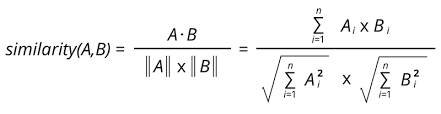

In [13]:
Image(filename='cosinus.png') 

In [34]:
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[2]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(B)
cos = dot / (norma * normb)

cos

0.02441834581107996

In [35]:
A=normal_matrix.T

In [36]:
A.shape

(133, 7)

# # matrix adjacency

In [37]:
res_graph = normal_matrix * normal_matrix.T # similaritas /adjacency matrix
G=res_graph.toarray()

In [38]:
print(res_graph.toarray())

[[1.         0.0490557  0.02441835 0.03392138 0.         0.0144957
  0.        ]
 [0.0490557  1.         0.13351454 0.14238252 0.20144448 0.10821742
  0.15106091]
 [0.02441835 0.13351454 1.         0.02743537 0.21278833 0.10660355
  0.14588743]
 [0.03392138 0.14238252 0.02743537 1.         0.13356943 0.12533827
  0.04019636]
 [0.         0.20144448 0.21278833 0.13356943 1.         0.14390671
  0.08139391]
 [0.0144957  0.10821742 0.10660355 0.12533827 0.14390671 1.
  0.2899365 ]
 [0.         0.15106091 0.14588743 0.04019636 0.08139391 0.2899365
  1.        ]]


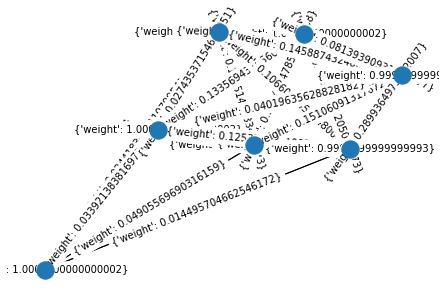

In [19]:
G = nx.from_numpy_matrix(np.matrix(G), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

Banyaknya sisi 26
Banyaknya node 7


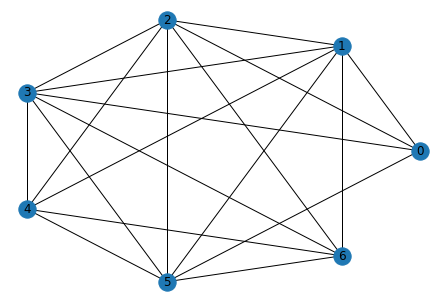

In [20]:
#nx_graph = nx.from_scipy_sparse_matrix(res_graph, parallel_edges=True, create_using=nx.MultiGraph)
#nx_graph=nx.from_scipy_sparse_matrix(res_graph, create_using=nx.DiGraph())
nx_graph=nx.from_scipy_sparse_matrix(res_graph)#

#nx_graph = nx.from_numpy_matrix(res_graph, create_using=nx.DiGraph)
nx.draw_circular(nx_graph,with_labels=True)
#nx.draw(G,with_labels=True)
print('Banyaknya sisi {}'.format(nx_graph.number_of_edges()))
print('Banyaknya node {}'.format(nx_graph.number_of_nodes()))
plt.show()


In [21]:
pageranks = nx.pagerank(nx_graph)

In [22]:
for i in pageranks:
    print(i, pageranks[i])

0 0.12542648666158782
1 0.15231338510598225
2 0.14215495364156552
3 0.13457691686660408
4 0.1497567765493318
5 0.1509612116991569
6 0.14481026947577166


In [23]:
sentence_array = sorted(((pageranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)
print(sentence_array)

[['0.15231338510598225'
  'Rizieq ditahan sebagai tersangka dalam kasus kerumunan massa di pernikahan putrinya.Mengenai hal itu, Wakil Ketua Umum Majelis Ulama Indonesia (MUI) Anwar Abbas mengatakan, melakukan kegiatan yang telah menyebabkan terjadinya kerumunan itu jelas tidak baik.']
 ['0.1509612116991569'
  'Pertanyaan saya kalau Rizieq di interogasi dan ditahan karena tindakannya itu, apakah orang lain yang juga melakukan hal yang sama juga sudah diinterogasi dan ditahan?” tanya dia.Apabila sudah, berarti pihak kepolisian sudah menegakkan hukum dan keadilan dengan sebaik-baiknya.']
 ['0.1497567765493318'
  'Banyak masyarakat yang mengundang kerumunan, namun tidak ditahan.“Sepanjang pengetahuan saya sangat banyak orang yang melakukan kegiatan yang mengundang kerumunan.']
 ['0.14481026947577166'
  'Akan tetapi, jikalau belum menegakkan keadilan di masyarakat, berarti pihak kepolisian belum menegakkan hukum dengan sebaik-baiknya.“Kalau itu yang terjadi, maka hal demikian jelas akan me

In [24]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [25]:
print('maximum pagerank',rank_max)
print('maximum pagerank',rank_min)

maximum pagerank 0.15231338510598225
maximum pagerank 0.12542648666158782


In [26]:
temp_array = []

# Jika semua rank sama
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))
print(temp_array)
print(sentence_array[4],[0])

7
[1.0, 0.9497088364572134, 0.9049124776538345, 0.7209378521019079, 0.6221791261857269, 0.34033044845021965, 0.0]
['0.14215495364156552'
 'Sebab, Covid-19 akan menular dengan cepat melalui kerumunan tersebut.“Oleh karena itu di masa Covid-19 ini kita jangan menyelenggarakan acara yang mengundang orang untuk berkumpul-kumpul sehingga terjadi kerumunan,” jelasnya kepada JawaPos.com, Minggu (13/12).Namun, ia juga mempertanyakan keadilan atas kasus kerumunan tersebut.'] [0]


In [27]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array))# + 0.2

In [28]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [29]:
#model = sentence_list
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close



Rizieq ditahan sebagai tersangka dalam kasus kerumunan massa di pernikahan putrinya.Mengenai hal itu, Wakil Ketua Umum Majelis Ulama Indonesia (MUI) Anwar Abbas mengatakan, melakukan kegiatan yang telah menyebabkan terjadinya kerumunan itu jelas tidak baik. Pertanyaan saya kalau Rizieq di interogasi dan ditahan karena tindakannya itu, apakah orang lain yang juga melakukan hal yang sama juga sudah diinterogasi dan ditahan?” tanya dia.Apabila sudah, berarti pihak kepolisian sudah menegakkan hukum dan keadilan dengan sebaik-baiknya. Banyak masyarakat yang mengundang kerumunan, namun tidak ditahan.“Sepanjang pengetahuan saya sangat banyak orang yang melakukan kegiatan yang mengundang kerumunan. Akan tetapi, jikalau belum menegakkan keadilan di masyarakat, berarti pihak kepolisian belum menegakkan hukum dengan sebaik-baiknya.“Kalau itu yang terjadi, maka hal demikian jelas akan menimbulkan keresahan di tengah-tengah masyarakat dan itu jelas tidak baik bagi perkembangan kehidupan berbangsa d

<function TextIOWrapper.close()>

In [30]:
threshold

0.6482955344069862

In [31]:
temp_array

[1.0,
 0.9497088364572134,
 0.9049124776538345,
 0.7209378521019079,
 0.6221791261857269,
 0.34033044845021965,
 0.0]

$A=USV^{T}$

In [32]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(A, n_components=100, n_iter=100, random_state = None)

In [33]:
VT.shape

(7, 7)